<a href="https://colab.research.google.com/github/Shafrinnisha/OIBSIP_Data_Science/blob/main/5_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor


Load the data

In [34]:
#Load datset
df = pd.read_csv('Advertising.csv')

# Display the first few rows of the dataset
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Data Cleaning and Data Exploring

In [35]:
# Drop unnecessary columns
df.drop(columns='Unnamed: 0',axis=1,inplace=True)
df.sample(2)

,TV,Radio,Newspaper,Sales
98,289.7,42.3,51.2,25.4
130,0.7,39.6,8.7,1.6


In [36]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [37]:
# Display the shape of the dataset
df.shape

(200, 4)

In [38]:
# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


Data visualization

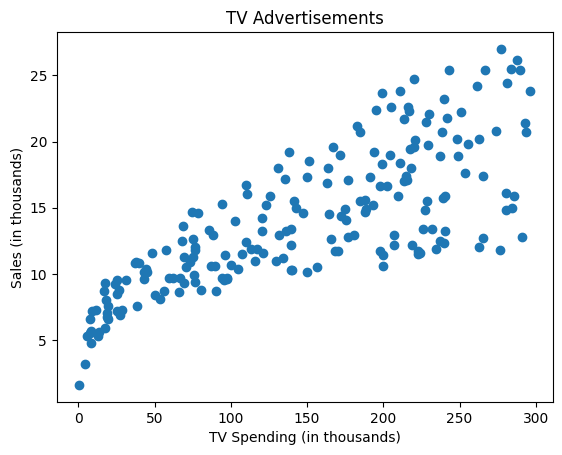

In [39]:
# Scatter plot for TV advertising
plt.scatter(df['TV'], df['Sales'])
plt.title('TV Advertisements')
plt.xlabel('TV Spending (in thousands)')
plt.ylabel('Sales (in thousands)')
plt.show()

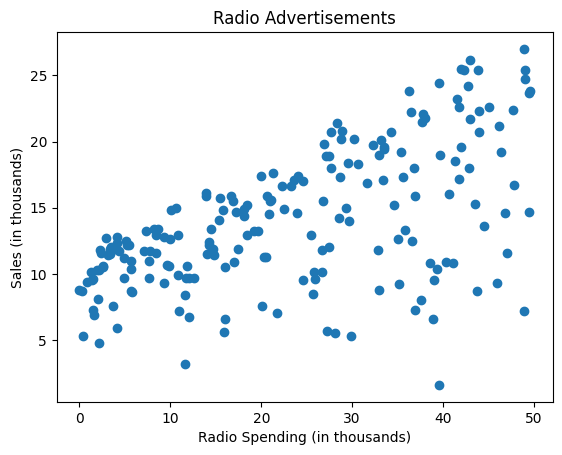

In [40]:
# Scatter plot for Radio advertising
plt.scatter(df['Radio'], df['Sales'])
plt.title('Radio Advertisements')
plt.xlabel('Radio Spending (in thousands)')
plt.ylabel('Sales (in thousands)')
plt.show()

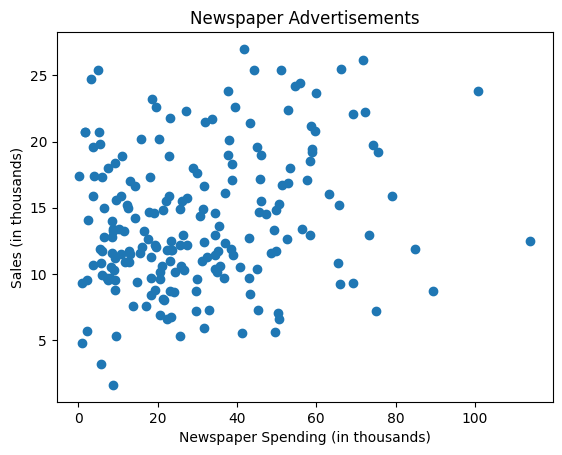

In [41]:
# Scatter plot for Newspaper advertising
plt.scatter(df['Newspaper'], df['Sales'])
plt.title('Newspaper Advertisements')
plt.xlabel('Newspaper Spending (in thousands)')
plt.ylabel('Sales (in thousands)')
plt.show()

<ipython-input-42-1f6a532580d6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TV'])


<Axes: xlabel='TV', ylabel='Density'>

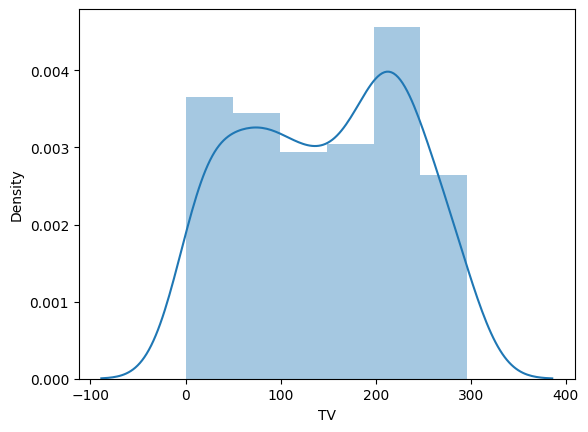

In [42]:
sns.distplot(df['TV'])

<ipython-input-43-6a0fc54c08d4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Radio'])


<Axes: xlabel='Radio', ylabel='Density'>

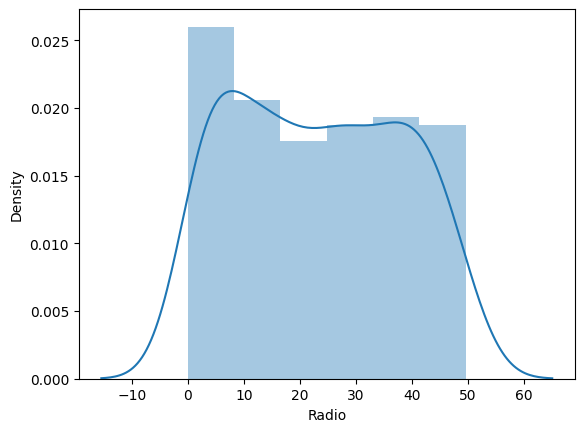

In [43]:
sns.distplot(df['Radio'])

<ipython-input-44-6fe4fcc6000a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Newspaper'])


<Axes: xlabel='Newspaper', ylabel='Density'>

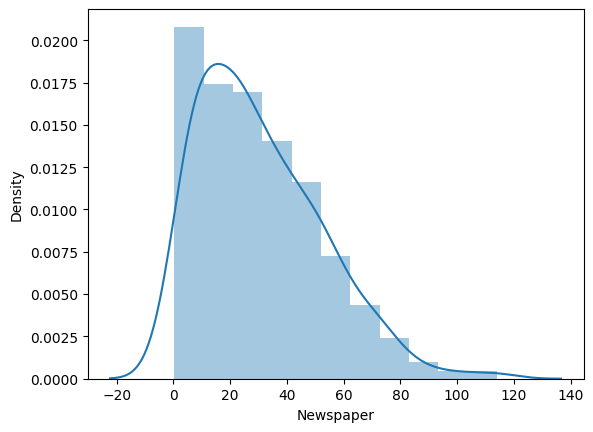

In [44]:
sns.distplot(df['Newspaper'])

Data Preprocessing

In [45]:
# Standardize features
scaler = StandardScaler()
X = df.iloc[:,:-1]
X = scaler.fit_transform(X)

In [46]:
Y = df['Sales']

In [47]:
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

Linear Regression

In [48]:
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression()

In [49]:
Y_pred=linear_model.predict(X_test)

In [50]:
print(f"Linear Regression R2 Score: {r2_score(Y_test, Y_pred) * 100:.2f}%")

Linear Regression R2 Score: 89.94%


Ridge Regression Model

In [51]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, Y_train)

Ridge(alpha=0.1)

In [52]:
Y_pred=ridge_model.predict(X_test)

In [53]:
print(f"Ridge Regression R2 Score: {r2_score(Y_test, Y_pred) * 100:.2f}%")

Ridge Regression R2 Score: 89.94%


Lasso Regression Model

In [54]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, Y_train)

Lasso(alpha=0.1)

In [55]:
Y_pred = lasso_model.predict(X_test)

In [56]:
print(f"Lasso Regression R2 Score: {r2_score(Y_test, Y_pred) * 100:.2f}%")

Lasso Regression R2 Score: 89.83%


Random forest

In [57]:
# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [58]:
Y_pred = rf_model.predict(X_test)

In [59]:
print(f"Random Forest Regressor R2 Score: {r2_score(Y_test, Y_pred) * 100:.2f}%")

Random Forest Regressor R2 Score: 98.13%


Predict new data using Random forest

In [60]:
# Predict sales on new data
# Ensure new data is scaled using the same scaler
new_data = pd.DataFrame({'TV': [150, 200], 'Radio': [30, 40], 'Newspaper': [20, 25]})
new_data_scaled = scaler.transform(new_data)
sales_predictions = rf_model.predict(new_data_scaled)

print(f'Sales Predictions: {sales_predictions}')

Sales Predictions: [16.68  20.201]
